**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Loading Dataset**

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Some meaning of classifications :

Education : ( 1 : 'Below College', 2 : 'College', 3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor')

Environment Satisfaction: ( 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High' )

Job Involvement: ( 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 'Very : High' )

Job Satisfaction: ( 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High' )

Performance Rating: ( 1 : 'Low', 2 : 'Good', 3 : 'Excellent', 4 : 'Outstanding' )

Relationship Satisfaction: ( 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High' )

Work-Life Balance: ( 1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best' )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
object_columns = df.select_dtypes(include=['object'])

In [ ]:
object_columns


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
int_columns=df.select_dtypes(include=["int64"])
int_columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
int_columns.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
object_columns.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

We have 9 object features and the rest are integer features

In [ ]:
int_columns.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.duplicated().any().sum()

0

There is no null or duplicated values in the dataset

In [ ]:
for i in df.columns:
    if len(df[i].unique()) == 1:
        print(i)


EmployeeCount
Over18
StandardHours


EmployeeCount, Over18, StandardHours values are all the same so they don't affect the attrition

EmployeeNumber doesn't affect the attrition either

In [ ]:
df=df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)
object_columns=object_columns.drop(['Over18'],axis=1)
int_columns=int_columns.drop(['EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

In [ ]:
len(df.columns)

31

In [ ]:
for i in object_columns.columns :
  print("Unique values of " , i , set(object_columns[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of  Department {'Sales', 'Research & Development', 'Human Resources'}
Unique values of  EducationField {'Technical Degree', 'Life Sciences', 'Other', 'Medical', 'Marketing', 'Human Resources'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Healthcare Representative', 'Manufacturing Director', 'Manager', 'Human Resources', 'Sales Representative', 'Research Scientist', 'Laboratory Technician', 'Research Director', 'Sales Executive'}
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
Unique values of  OverTime {'Yes', 'No'}


**Relationships in Data**

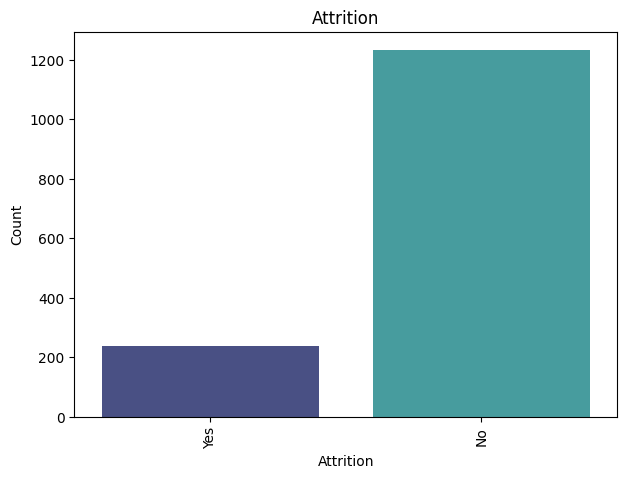

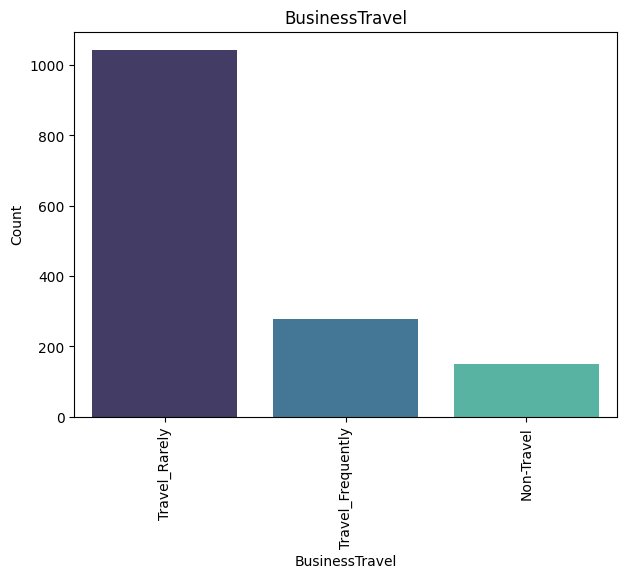

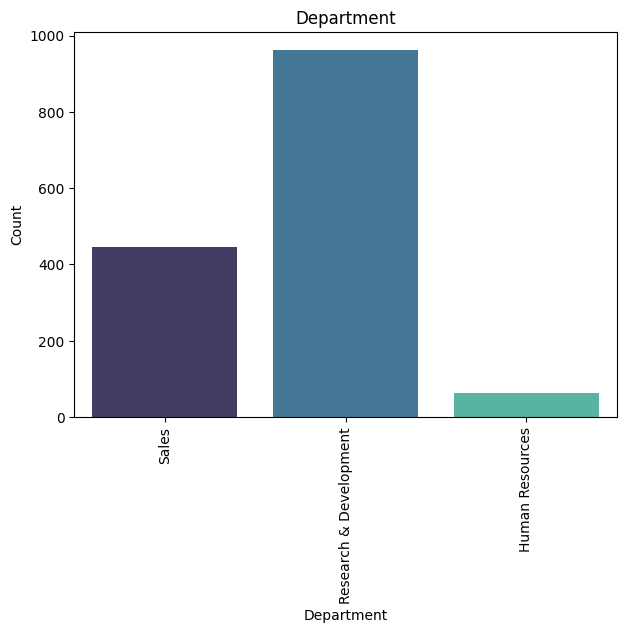

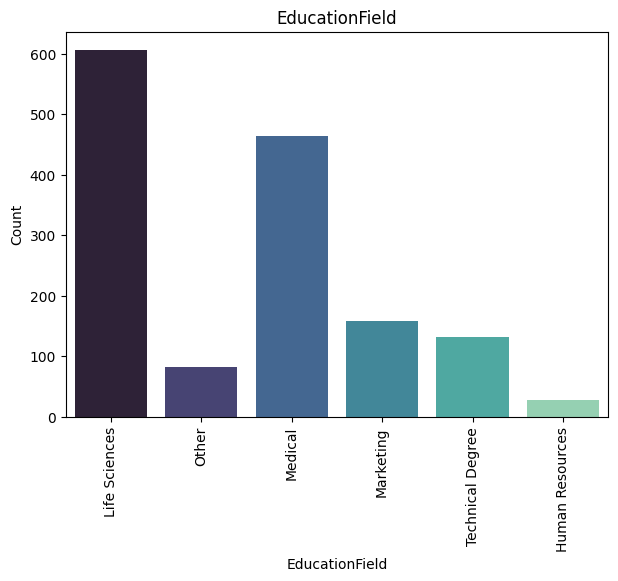

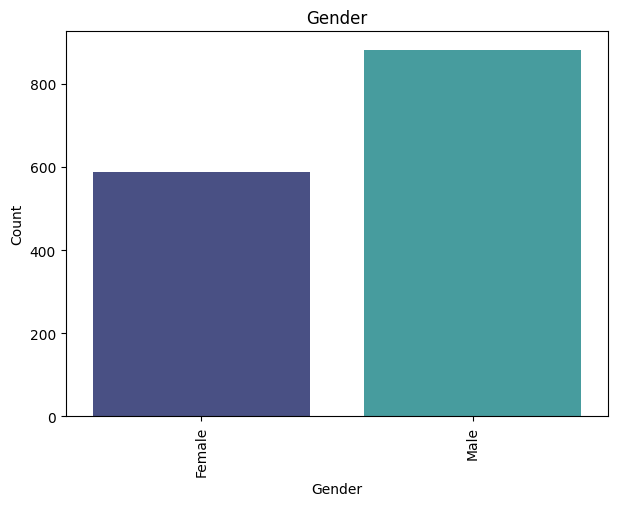

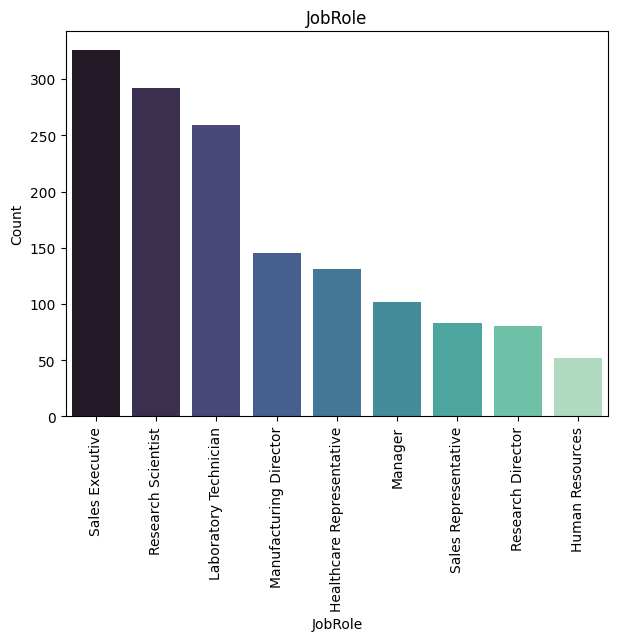

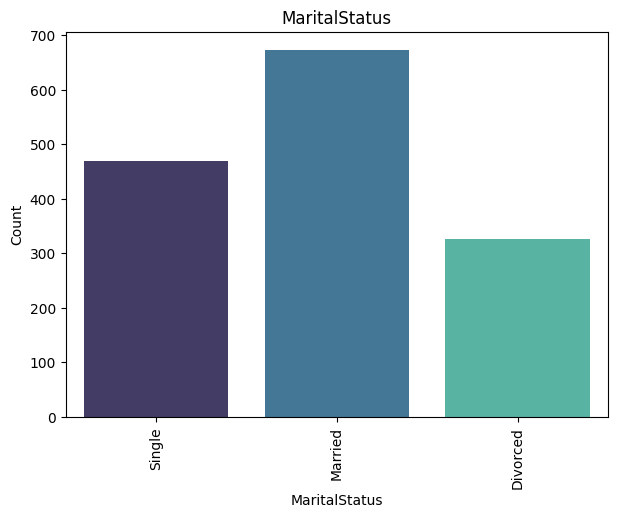

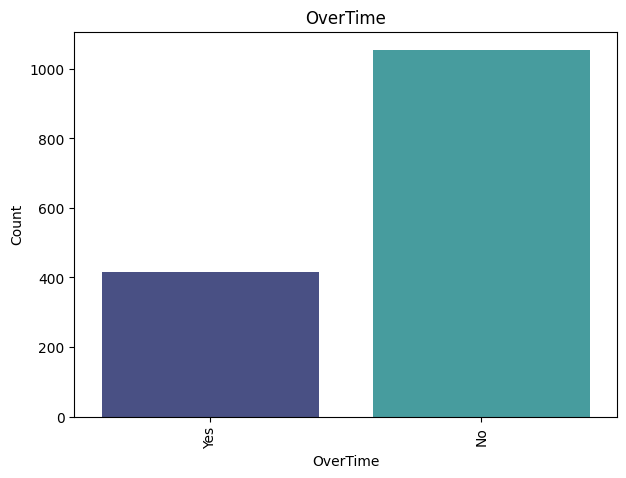

In [ ]:
cat = df.select_dtypes(['object']).columns

for col in cat:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=col,palette="mako")
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, color="black")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


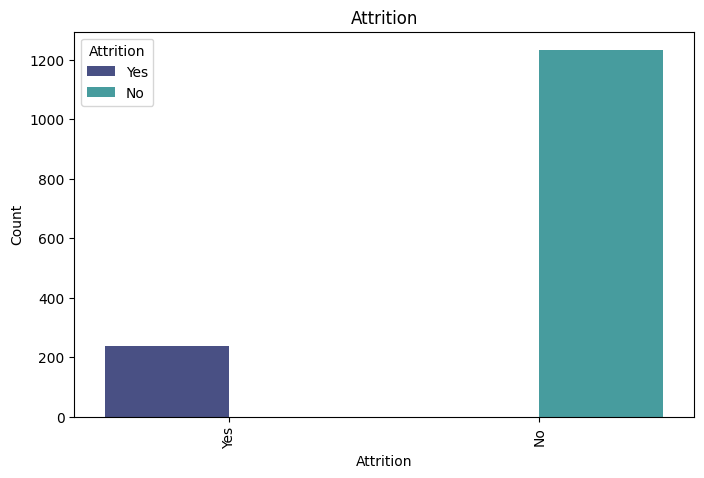

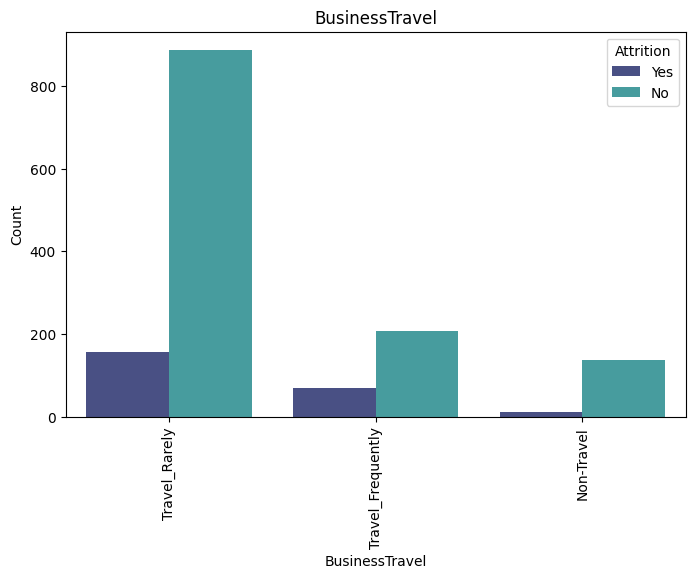

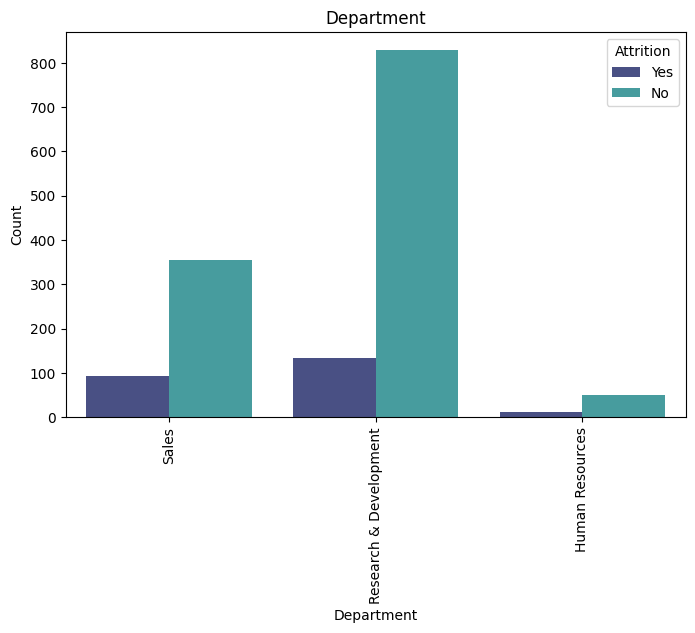

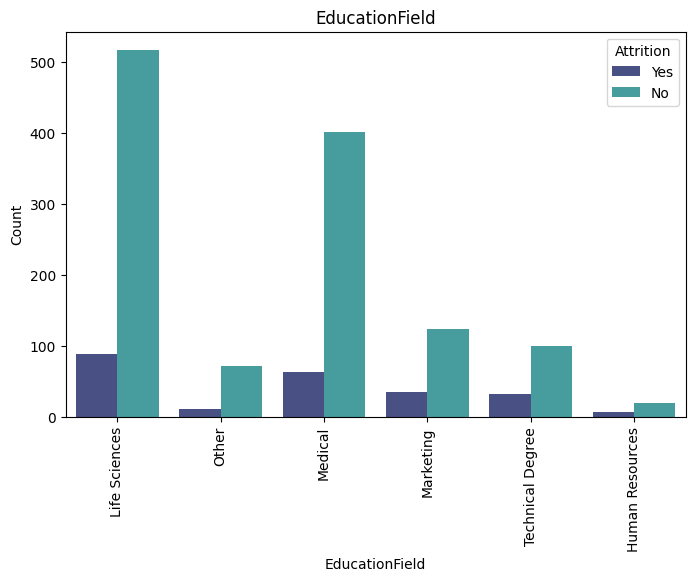

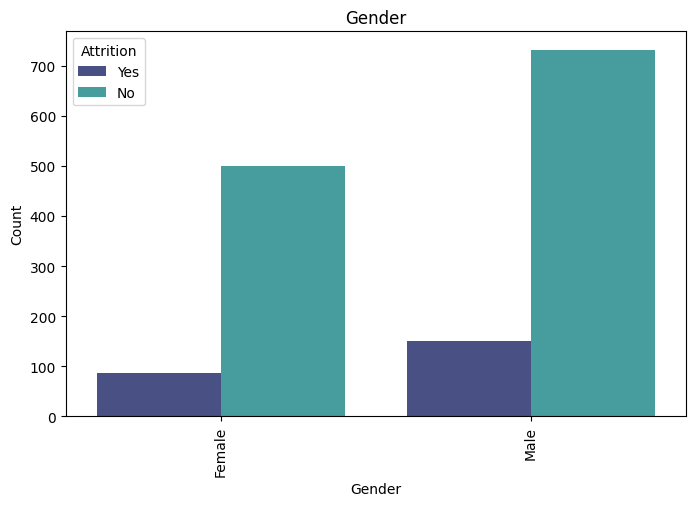

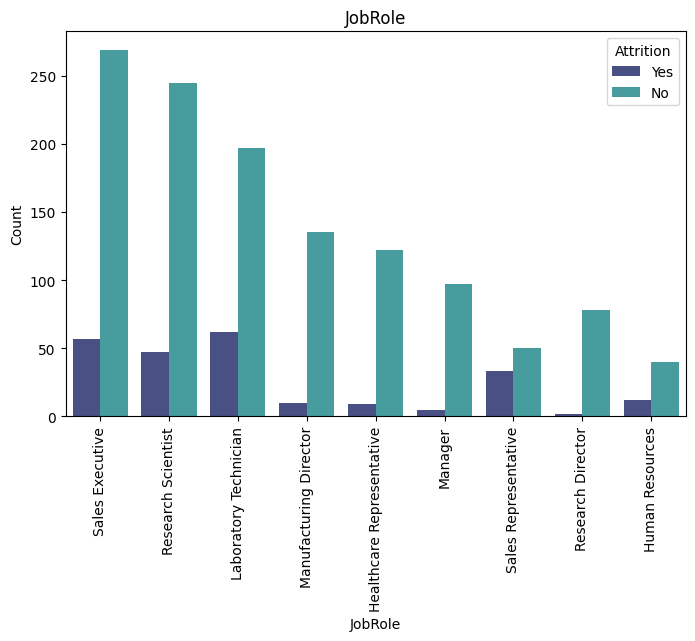

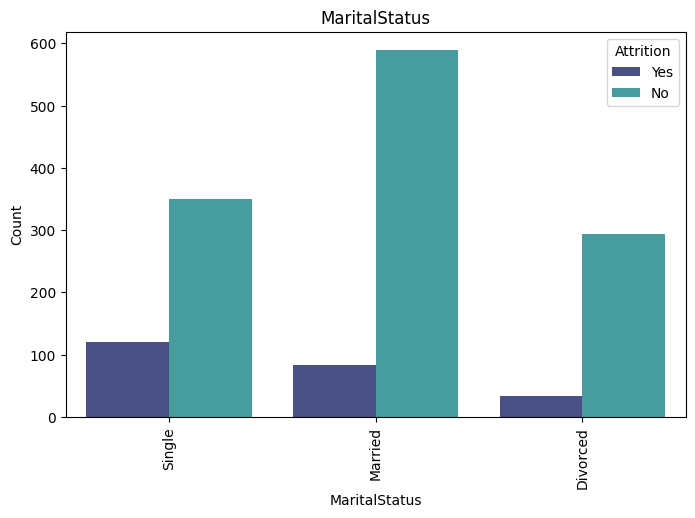

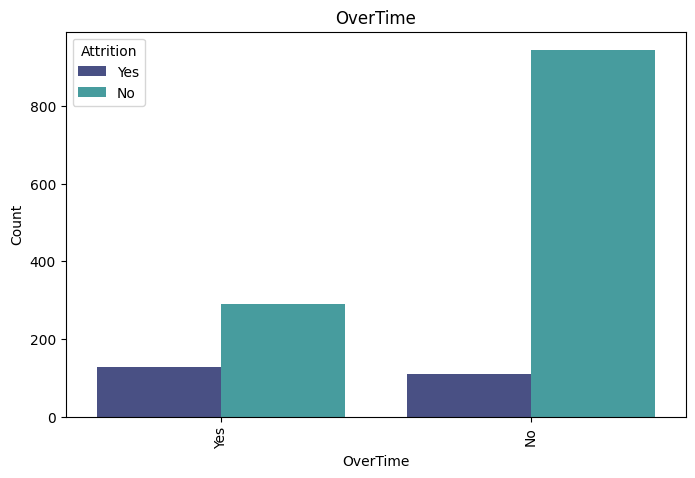

In [ ]:
for col in cat:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette="mako", hue="Attrition")
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, color="black")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


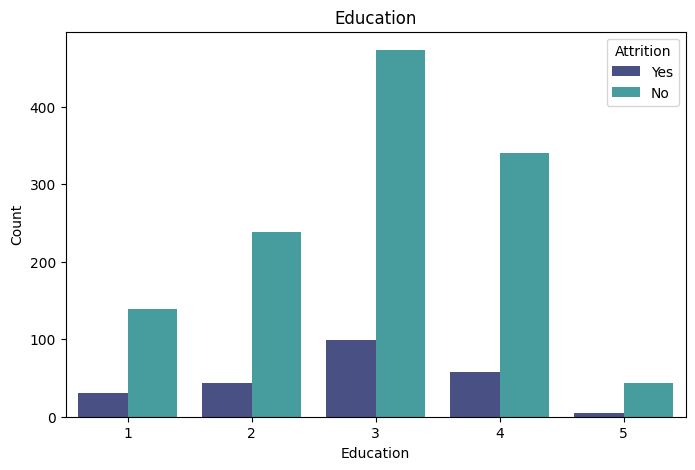

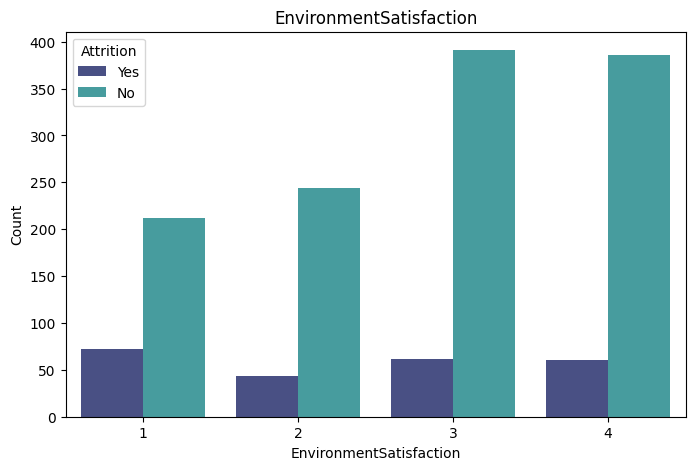

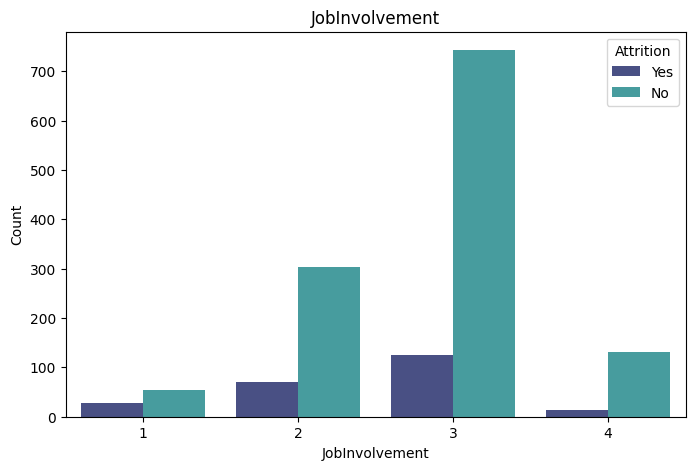

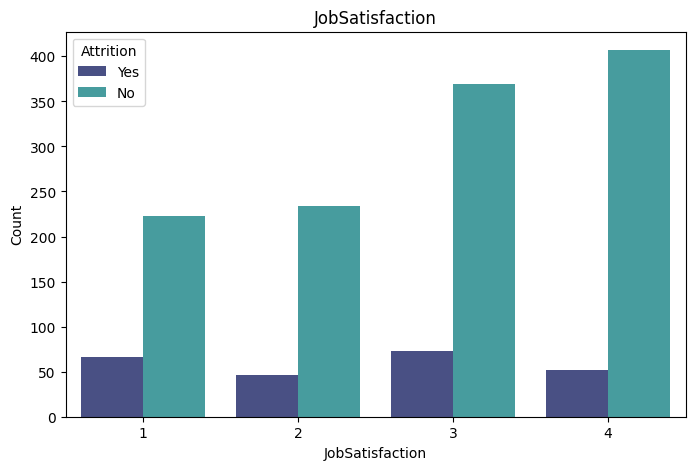

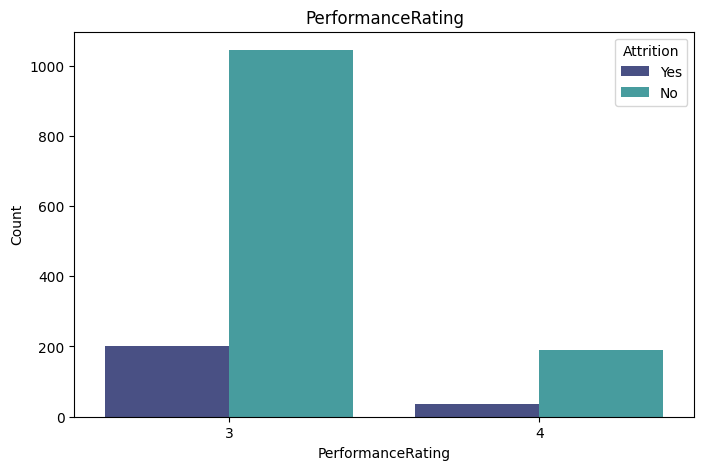

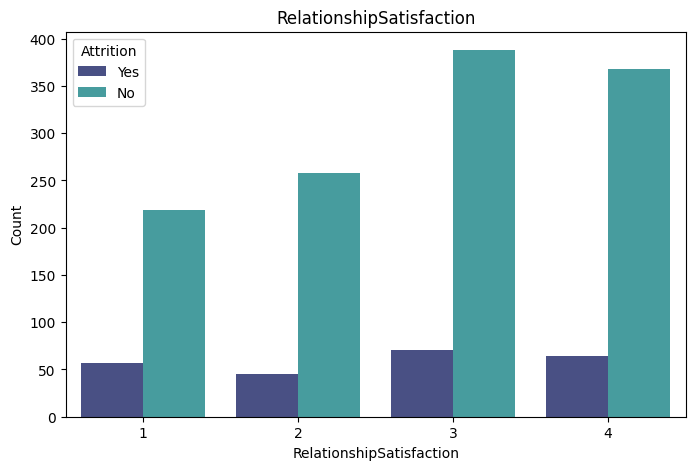

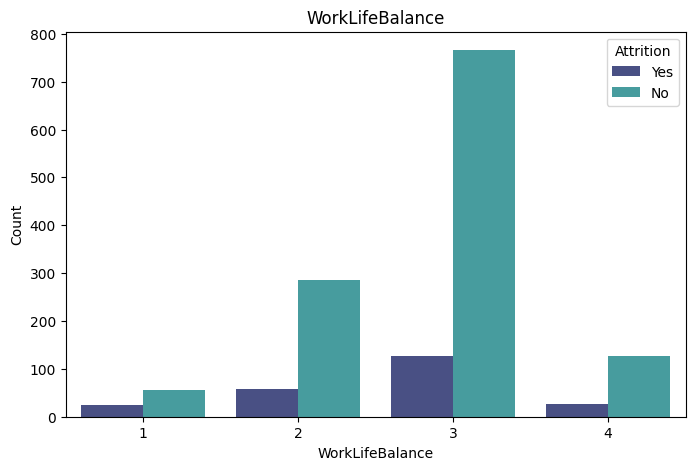

In [ ]:
categorical_features_list = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'WorkLifeBalance'
]

for c in categorical_features_list:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=c, data=df, palette="mako", hue="Attrition")
    plt.title(c, fontsize=12, color="black")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


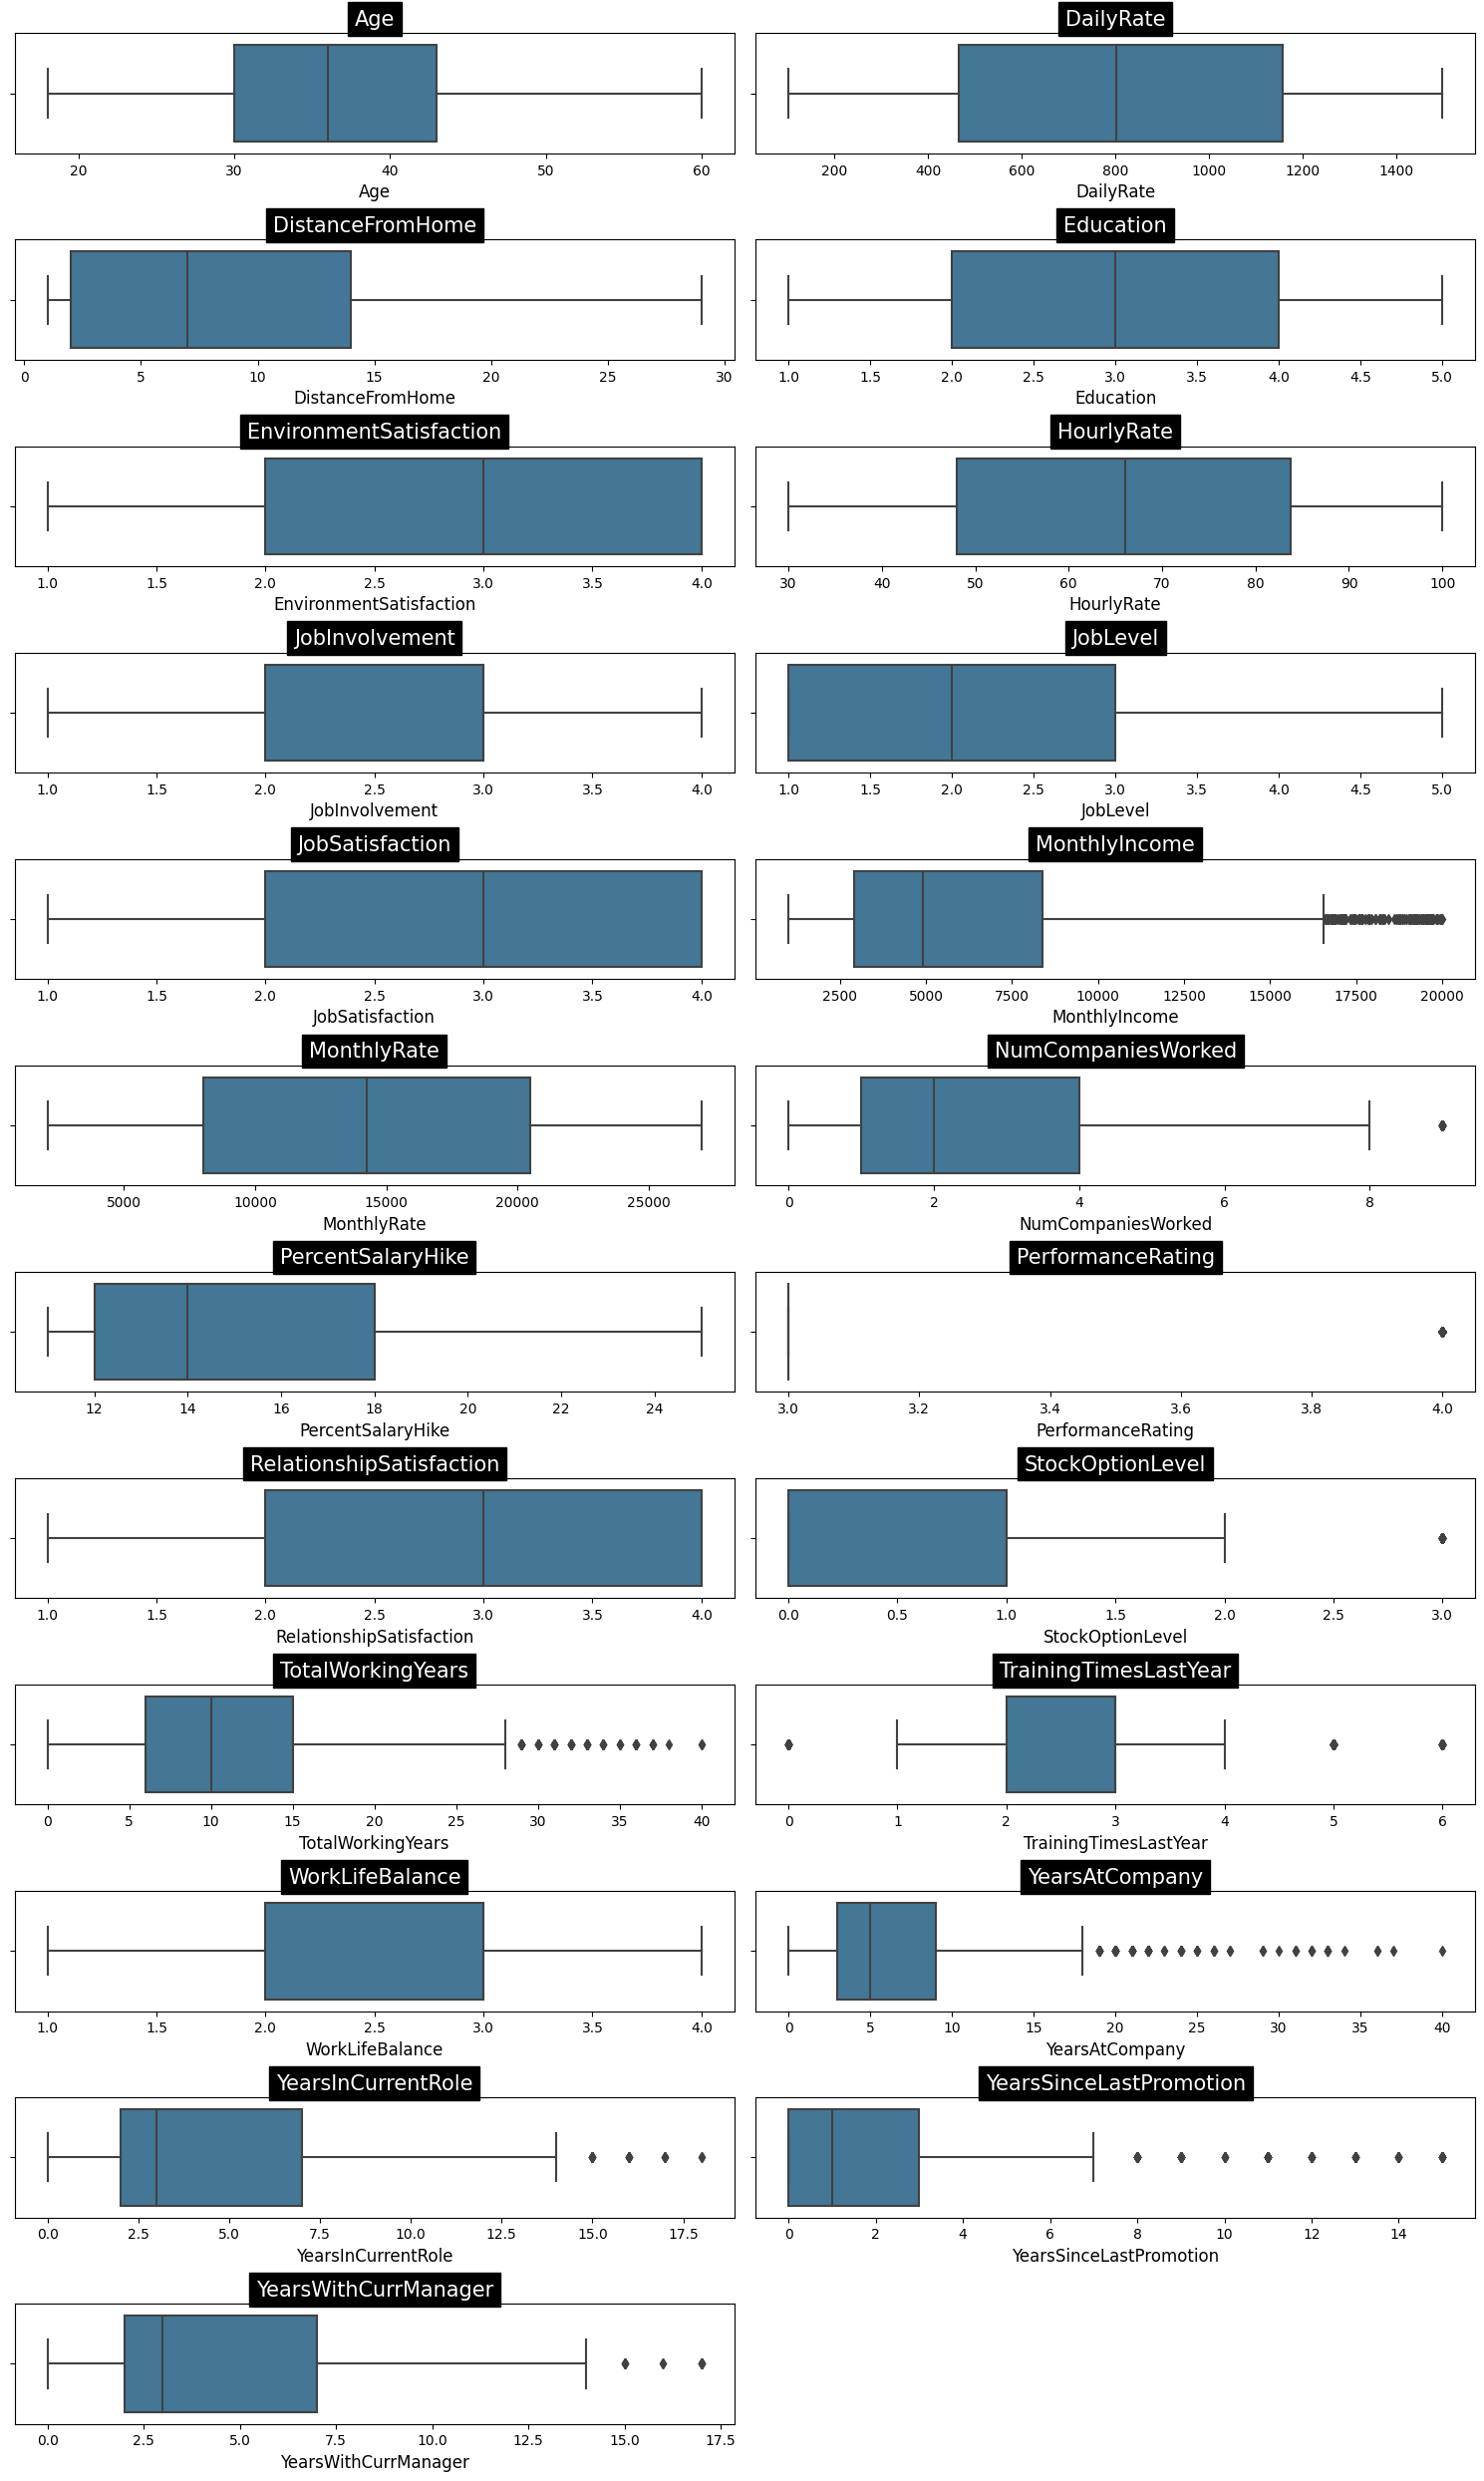

In [ ]:
num = df.select_dtypes(['number']).columns
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df,palette="mako")
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

<Figure size 500x1000 with 0 Axes>

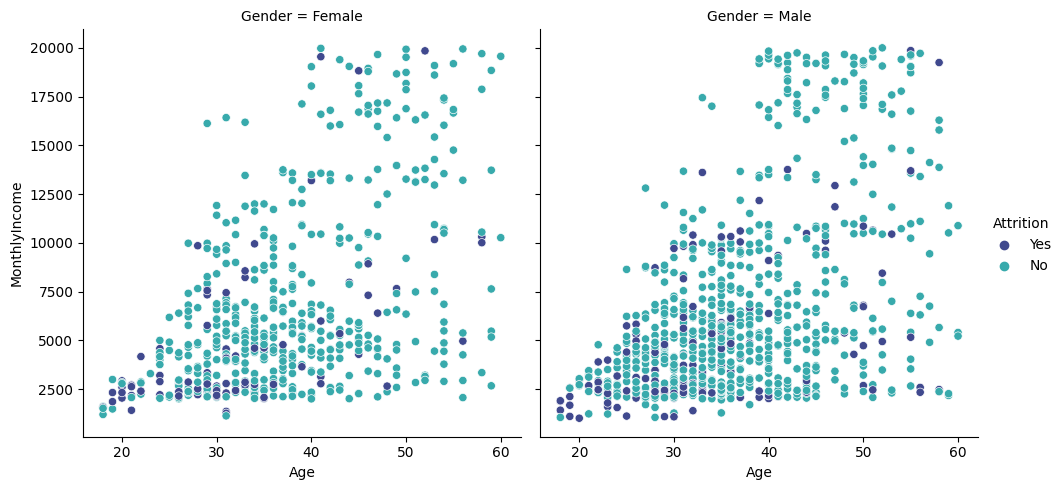

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender',palette="mako")
plt.show()

<Figure size 500x1000 with 0 Axes>

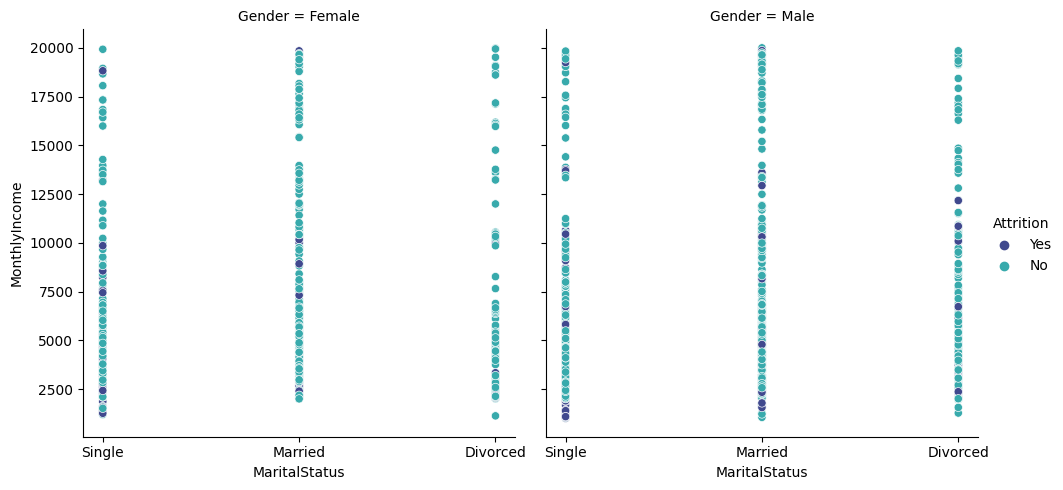

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender',palette="mako")
plt.show()

<Figure size 500x1000 with 0 Axes>

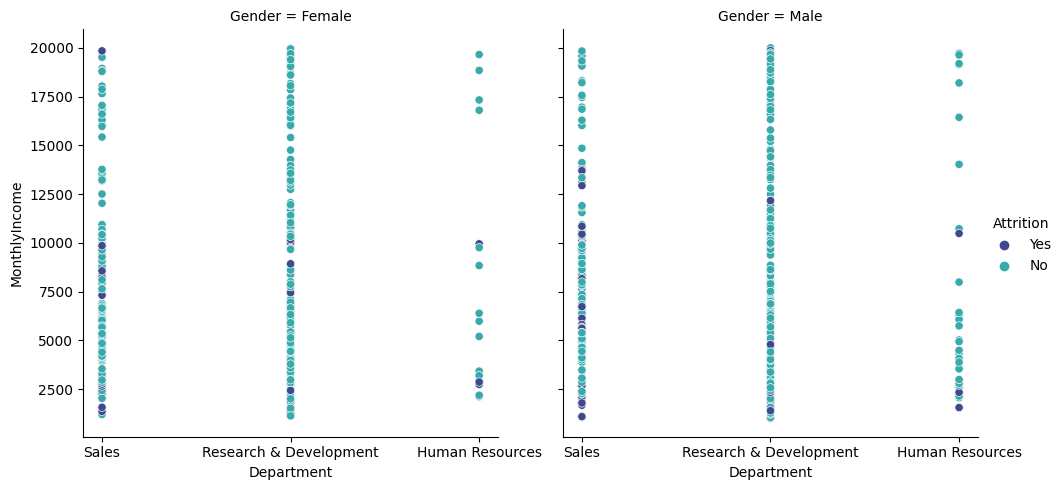

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender',palette="mako")
plt.show()

<Figure size 500x1000 with 0 Axes>

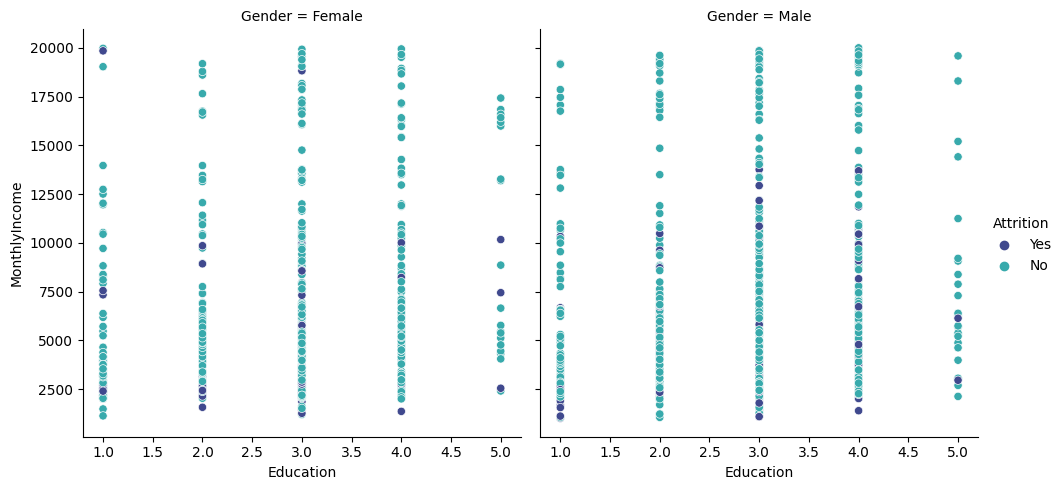

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender',palette="mako")
plt.show()

<ipython-input-25-ac6f069435fa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


<Figure size 500x1000 with 0 Axes>

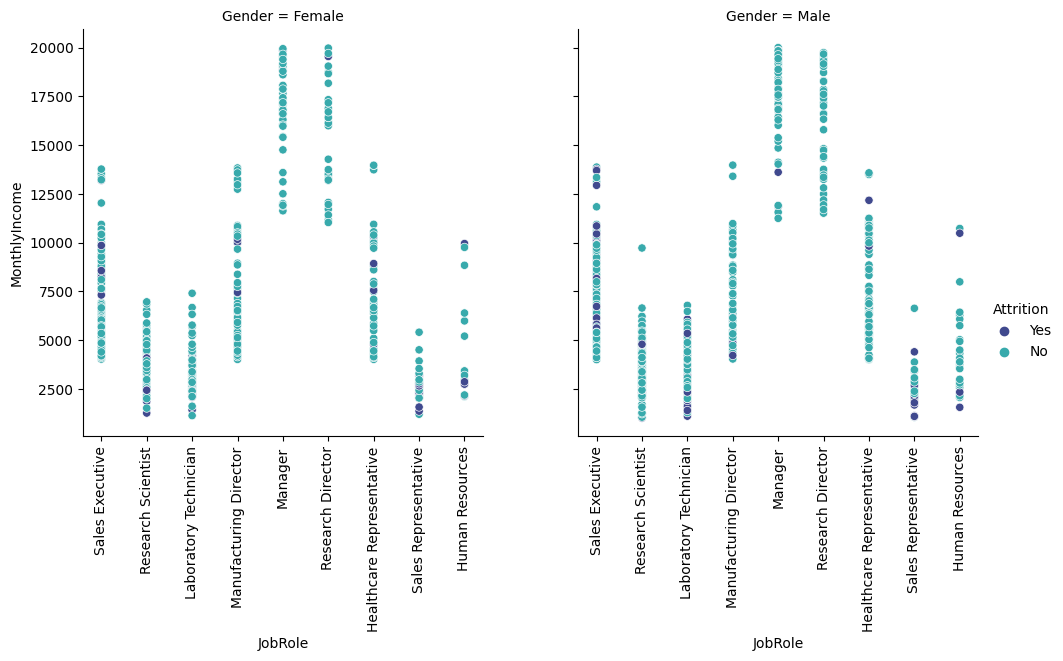

In [ ]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender',palette="mako")
rotation = 90
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

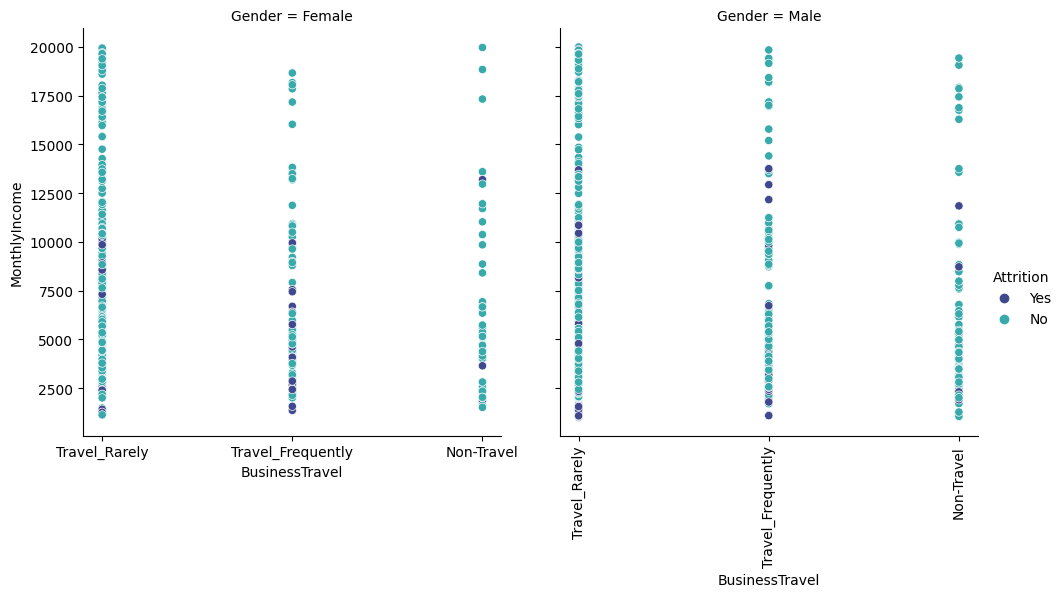

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender',palette="mako")
plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

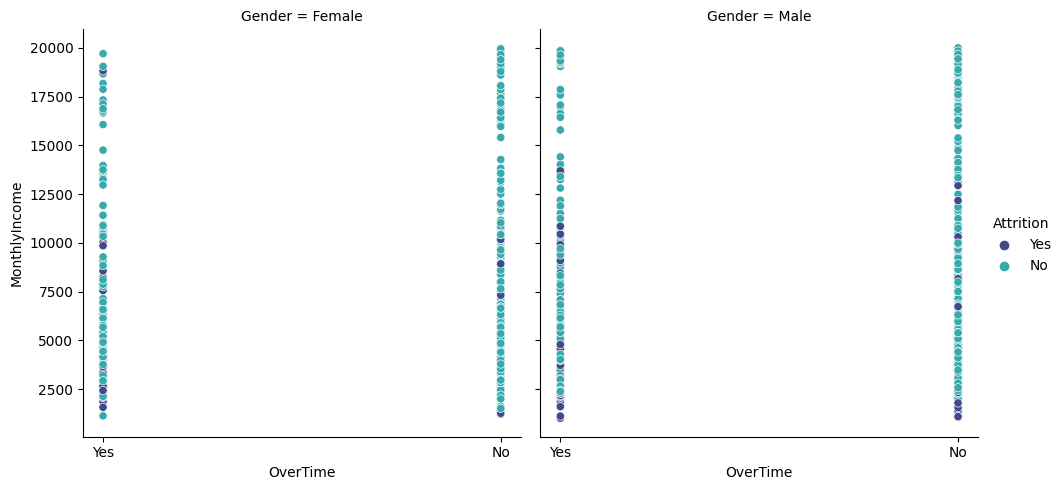

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="OverTime", hue="Attrition",col='Gender',palette="mako")
plt.show()

<Figure size 500x1000 with 0 Axes>

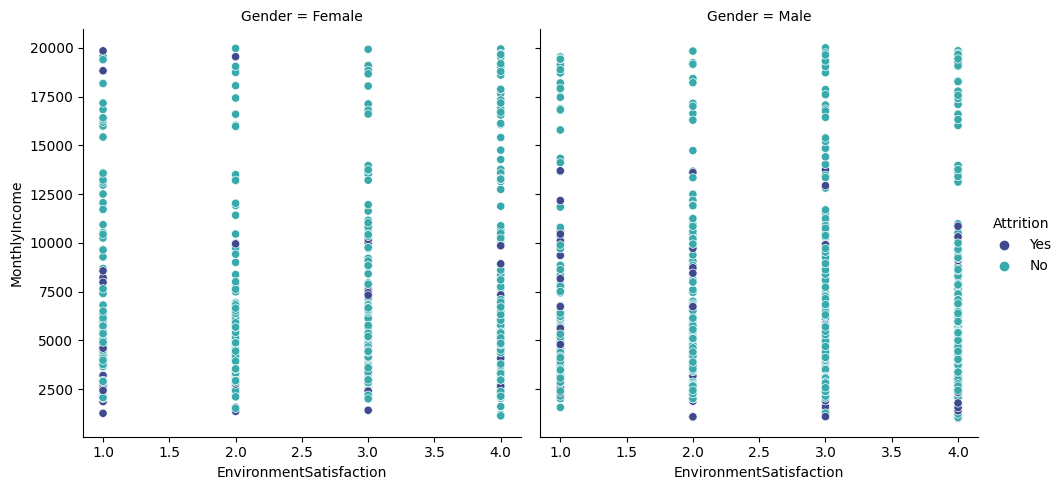

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="EnvironmentSatisfaction", hue="Attrition",col='Gender',palette="mako")
plt.show()

<Figure size 500x1000 with 0 Axes>

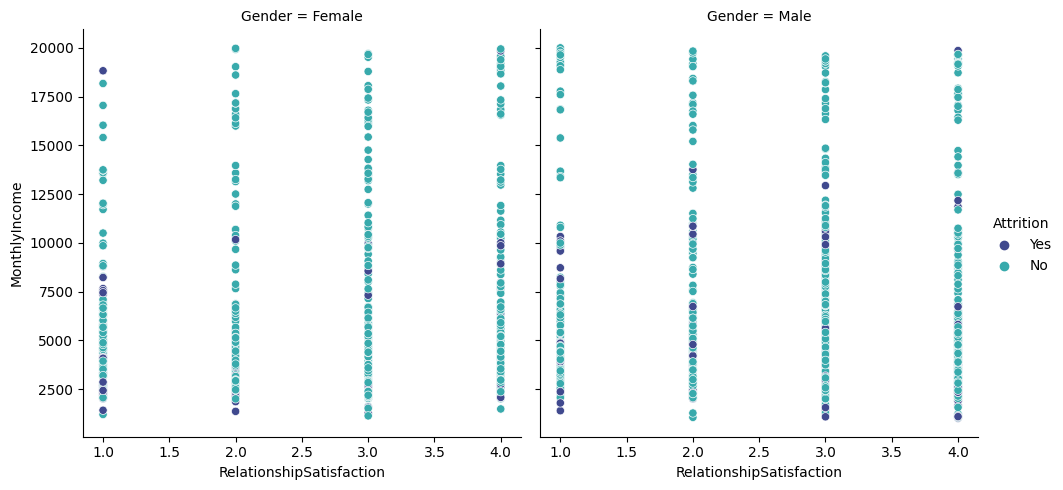

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="RelationshipSatisfaction", hue="Attrition",col='Gender',palette="mako")
plt.show()

<Figure size 500x1000 with 0 Axes>

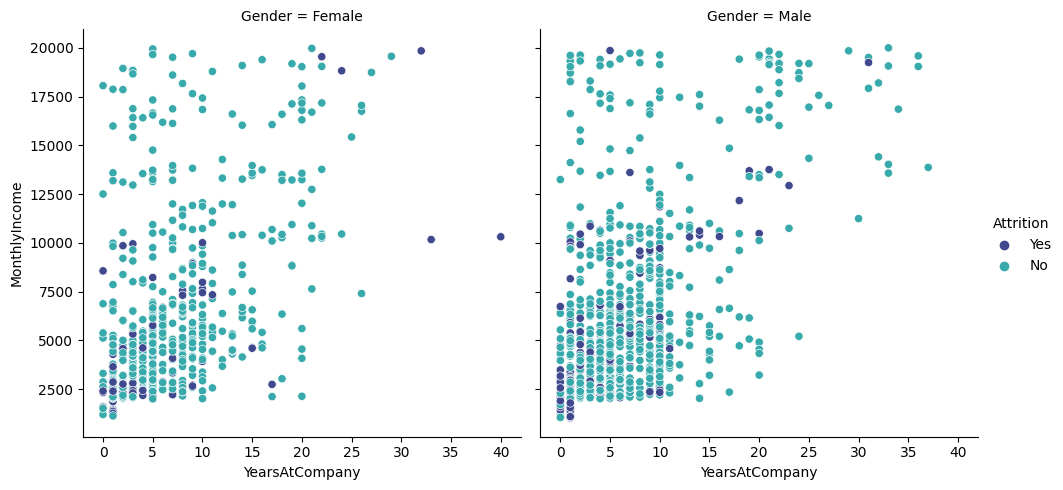

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="YearsAtCompany", hue="Attrition",col='Gender',palette="mako")
plt.show()

**Graphs Analysis**

1) Attrition tends to be more prevalent among individuals aged 20 to 35 but decreases as age rises. This pattern holds true for both males and females.

2) The attrition rate for divorced women is nearly negligible.

3) Attrition generally declines as income levels increase.

4) Men working in the role of sales experts experience a notably high attrition rate.

5) Employees who frequently travel for work exhibit higher attrition rates compared to those with less frequent travel.

6) women in managerial, research director, and laboratory technician positions have minimal attrition.

<ipython-input-31-f290d8e7133b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


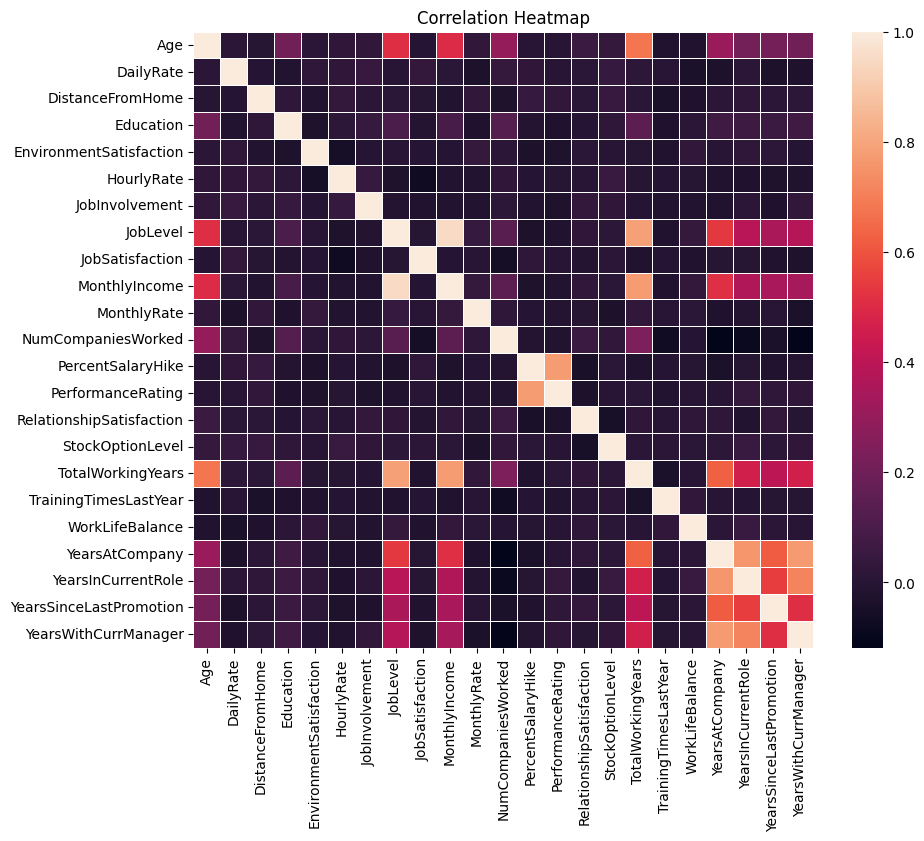

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap without displaying numbers
plt.figure(figsize=(10, 8))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(correlation_matrix, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Corelation Analysis**

There is a robust correlation between the total hours worked and both income and job level.

**Machine Learning Models**

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

DF = df.copy()


columns_to_encode = ['BusinessTravel', 'Attrition', 'OverTime', 'Gender', 'MaritalStatus', 'Department', 'EducationField', 'JobRole']

label_encoder = LabelEncoder()


for column in columns_to_encode:
    DF[column] = label_encoder.fit_transform(DF[column])

**Data Splitting**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

**Logisitc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix  # Import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8809523809523809


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


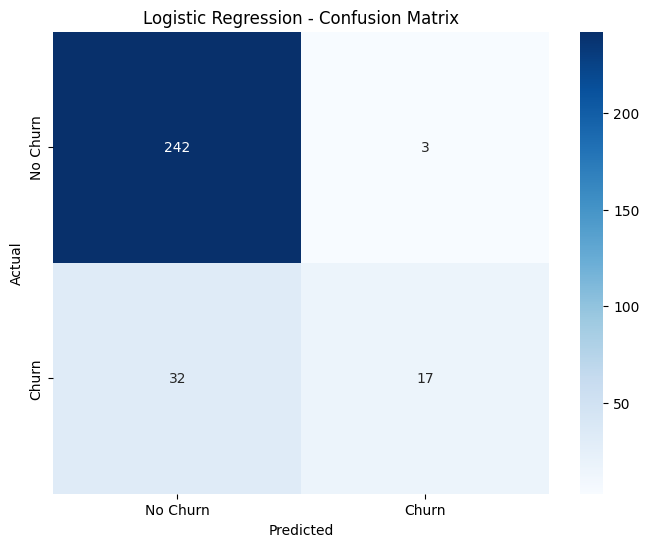

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)  # Use confusion_matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

**Logisitc Regression Accuracy is around 88%**




**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9761904761904762


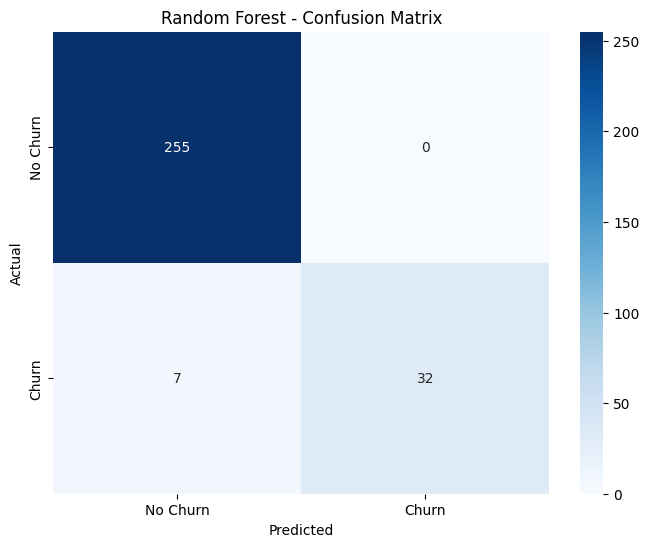

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

**Random Forest Accuracy is around 97.6%**

# **the best model with 97.6% accuracy was the Random Forest**